In [1]:
# !pip install tqdm

In [2]:
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
from torchvision import models, transforms




In [3]:
torch.manual_seed(1234)

np.random.seed(1234)
random.seed(1234)


In [4]:
# torch.backends.cudnn.deterministic =True

# torch.backends.cudnn.benchmark = False

In [10]:
class ImageTransform():
    # 画像の前処理クラスらしい。訓練時と検証時に異る動作をするのは、
    # データオーギュメーション(水増し？)のため
    # 
    
    def __init__(self, resize, mean, std):
        self.data_transform = {
            "train": transforms.Compose([
                transforms.RandomResizedCrop(
                    resize, scale = (0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
            ]),
            "val":transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
            ])
        }
        
        
    def __call__(self, img, phase="train"):
        # phaseで、前処理モードか、推論モードかを
        return self.data_transform[phase](img)

        

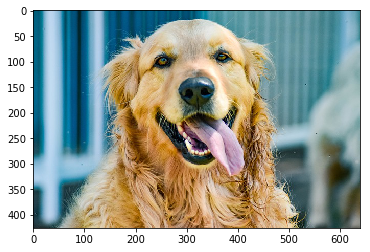

In [15]:
image_file_path = "./data/goldenretriever-3724972_640.jpg"

img = Image.open(image_file_path)

plt.imshow(img)
plt.show

size = 224
mean = (0.485, 0.456, 0.405)
std = (0.229, 0.224, 0.225)

transform = ImageTransform(size, mean, std)
img_transformed = transform(img, phase ="train")

# 色、高さ、幅を、高さ、幅、色に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1,2,0))
img_transformed = np.clip(img_transformed, 0 , 1)



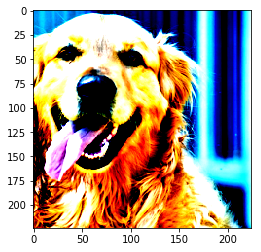

In [21]:
plt.imshow(img_transformed)
plt.show()

In [22]:
def make_datapath_list(phase="train"):
    
    rootpath = "./data/hymenoptera_data/"
    target_path = osp.join(rootpath+phase+'/**/*.jpg')
    print(target_path)

    path_list = []
    
    for path in glob.glob(target_path):
        path_list.append(path)
        
    return path_list

In [26]:
train_list = make_datapath_list(phase="train")

val_list = make_datapath_list(phase="val")


./data/hymenoptera_data/train/**/*.jpg
./data/hymenoptera_data/val/**/*.jpg


In [80]:
class HymenopteraDataset(data.Dataset):
    
    def __init__ (self, file_list, transform=None, phase="train"):
        self.file_list = file_list
        self.transform = transform
        self.phase = phase
    
    def __len__(self):
        # 画像の枚数を返す
        return len(self.file_list)
    
    
    def __getitem__(self, index):
        # 前処理した画像のTensor形式データとラベルを取得
        
        img_path = self.file_list[index]
        img = Image.open(img_path)
        
        #画像の前処理
        img_transformed = self.transform(
            img, self.phase)
        
        
        
        if self.phase == "train":
            label = img_path[30:34]
        elif self.phase == "val":
            label = img_path[28:32]
        
        # ラベルを数値に変更する
        if label == "ants":
            label = 0
        elif label == "bees":
            label = 1
        
        return img_transformed, label
    

In [84]:
train_dataset = HymenopteraDataset(\
        file_list = train_list, transform = ImageTransform(size,mean,std), phase="train"
)

val_dataset = HymenopteraDataset(\
         file_list = val_list, transform = ImageTransform(size,mean,std), phase="val"
                                )


In [82]:
index =0
print(train_dataset.__getitem__(index)[0].size() )
print(train_dataset.__getitem__(index)[1] )

torch.Size([3, 224, 224])
1


In [86]:
print(val_dataset.__getitem__(index)[0].size() )
print(val_dataset.__getitem__(index)[1] )

torch.Size([3, 224, 224])
1


In [83]:
train_dataset.__getitem__(1)[1]

1

In [75]:
for i in range(1000):
    print(train_dataset.__getitem__(i)[1])

bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
bees
1
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0
ants
0

IndexError: list index out of range